# </center> Recommendation System to help New Expats to start Restaurant Business in New York </center>

### <a id="Content">Table of Contents </a>
1. Introduction
2. Data
3. Methodology 
4. Analysis & Machine Learning  
5. Results  


### 1. Introduction  
Shifting demographics and changing lifestyles are driving the surge in food-service businesses. Busy consumers don't have the time or inclination to cook. They want the flavor of fresh bread without the hassle of baking. They want tasty, nutritious meals without dishes to wash. In fact, the rise in popularity of to-go operations underscores some clear trends in the food-service industry. More and more singles, working parents and elderly people are demanding greater convenience when it comes to buying their meals. The cuisine of New York City comprises many cuisines belonging to various ethnic groups that have entered the United States through the city. Almost all ethnic cuisines are well represented in New York City, both within and outside the various ethnic neighborhoods. Its food culture includes an array of international cuisines influenced by the city’s immigrant history. So, it is evident that to survive in such competitive market it is very important to strategically plan. Various factors need to be studied in order to decide on location such as: 
- Are there any Farmers Markets, Wholesale markets etc. nearby so that the ingredients can be purchased fresh to maintain quality and cost?
- Are there any venues like Tourist attractions, Entertainment zones, Parks etc., nearby where floating population is high
- Saturated markets etc. And the list goes on… 

Even though well-funded XYZ Company Ltd. needs to choose the correct location to start its first venture. If this is successful, they can replicate the same in other locations. First move is very important, thereby choice of location is very important.

To build a recommendation model, following datasets and information are considered for analysis;
1. Scrapped https://geo.nyu.edu/catalog/nyu_2451_34572, to extract information about 5 New York boroughs. Also, considered local areas or neighborhoods for each borough for detailed analysis.
2. I used Foursquare API to get information about available venues for a given neighborhood and borough in NYC. The API also provided information about shopping area, transporatation, nightlife, leisure places etc in each neighborhood. 
3. A recommendation system is constructed suggesting suitable neighborhoods for opening new restaurant based on the customer prferences. It could be a value added feature to new expats who are willing to open business by suggesting them suitable Neighborhoods on the bassis of his profile. 


<a href='#Content'>Click to scroll back to Table of Contents</a>

### 2. Data
To examine the above said, following data sources will be used:

New York City Dataset

Link: https://geo.nyu.edu/catalog/nyu_2451_34572
Description: This New York City Neighborhood Names point file was created as a guide to New York City’s neighborhoods that appear on the web resource, “New York: A City of Neighborhoods.” Best estimates of label centroids were established at a 1:1,000 scale, but are ideally viewed at a 1:50,000 scale. This dataset will provide the addresses of neighborhood of NYC in json format. An extract of the json is as follows:
{'type': 'Feature',  
'id': 'nyu_2451_34572.306',  
'geometry': {'type': 'Point',  
'coordinates': [-74.08173992211962, 40.61731079252983]},  
'geometry_name': 'geom',  
'properties': {'name': 'Fox Hills',  
'stacked': 2,  
'annoline1': 'Fox',  
'annoline2': 'Hills',  
'annoline3': None,  
'annoangle': 0.0,  
'borough': 'Staten Island',  
'bbox': [-74.08173992211962, 40.61731079252983, -74.08173992211962, 0.61731079252983]}}  

Foursquare API:

Link: https://developer.foursquare.com/docs
Description: Foursquare API, a location data provider, will be used to make RESTful API calls to retrieve data about venues in different neighborhoods. This is the link to Foursquare Venue Category Hierarchy. Venues retrieved from all the neighborhoods are categorized broadly into "Arts & Entertainment", "College & University", "Event", "Food", "Nightlife Spot", "Outdoors & Recreation", etc. An extract of an API call is as follows:
'categories': [{'id': '4bf58dd8d48988d110941735',  
'name': 'Italian Restaurant',  
'pluralName': 'Italian Restaurants',  
'shortName': 'Italian',  
'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',  
'suffix': '.png'},  
'primary': True}],  
'verified': False,  
'stats': {'tipCount': 17},  
'url': 'http://eccorestaurantny.com',  
'price': {'tier': 4, 'message': 'Very Expensive', 'currency'  

<a href='#Content'>Click to scroll back to Table of Contents</a>

### 3. Methodology
**Download all the dependencies.**

In [1]:
import pandas as pd
import numpy as np
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import json 
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import wget
from pprint import pprint
from bs4 import BeautifulSoup
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
print('Libraries imported')

Libraries imported


**Download and Explore New York City Dataset**
In order to segment the neighborhoods of New York City, a dataset is required that contains the 5 boroughs and the neighborhoods, that exist in each borough, with respective latitude and longitude coordinates.

This dataset exists for free on the web. Here is the link

To the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572, and  
To its downloadable json format file: https://cocl.us/new_york_dataset/newyork_data.json

In [2]:
if os.path.exists('newyork_data.json'):
   os.remove('newyork_data.json')

wget.download('https://cocl.us/new_york_dataset/newyork_data.json')

print('\nData downloaded!')

100% [........................................................] 115774 / 115774
Data downloaded!


In [3]:
# open & load downloaded file, print its type
with open('newyork_data.json') as json_data:
   newyork_data = json.load(json_data)

In [4]:
print ("newyork_data key and value's length are: ") 
for key, value in newyork_data.items(): 
   print (key, len(str(value)))

newyork_data key and value's length are: 
type 17
totalFeatures 3
features 124743
crs 70
bbox 74


All the relevant data is in the features key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
neighborhoods_data = newyork_data['features']
pprint(neighborhoods_data[0])

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
              'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
                'annoline1': 'Wakefield',
                'annoline2': None,
                'annoline3': None,
                'bbox': [-73.84720052054902,
                         40.89470517661,
                         -73.84720052054902,
                         40.89470517661],
                'borough': 'Bronx',
                'name': 'Wakefield',
                'stacked': 1},
 'type': 'Feature'}


**Tranform the data into a pandas dataframe**

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

Then let's loop through the data and fill the dataframe one row at a time.

In [7]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                         'Neighborhood': neighborhood_name,
                                         'Latitude': neighborhood_lat,
                                         'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
print(neighborhoods.shape)
neighborhoods.head()

(306, 4)


Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
       len(neighborhoods['Borough'].unique()),
       neighborhoods.shape[0]
   )
)

The dataframe has 5 boroughs and 306 neighborhoods.


**Use geopy library to establish coordinates of New York City.**  
New York coordinates are used to set the center location:

In [10]:
address = 'New York, USA '

geolocator = Nominatim(user_agent="nyc_explorer")
location = geolocator.geocode(address)
latitude_nyc = location.latitude
longitude_nyc = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude_nyc, longitude_nyc))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


**Create a map of New York with neighborhoods superimposed on top**  
The Neighborhoods were mapped using folium library basis their coordinates:

In [11]:
map_newyork = folium.Map(location=[latitude_nyc, longitude_nyc], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'],
                                           neighborhoods['Longitude'],
                                           neighborhoods['Borough'],
                                           neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

**Define Foursquare Credentials and Version**  
Foursquare has numerous 'Venue Categories' that are used to identify each type of venue. A ‘GET’ request is sent to the ‘api.foursquare.com/v2/venues/explore?’ endpoint and results are utilized to explore the New York neighborhoods and venues and segment them.

In [12]:
CLIENT_ID = 'PXOLQG4J2VY3Z5BL2MMUGFOETGJZ0ZJ2XJVITBVBKGMSKVZE' # your Foursquare ID
CLIENT_SECRET = '2OR4HXI3NJCY3EOKWSR4VS4DY2WAD15FLZ0NYLLMN20AVXAH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' +  CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET )

Your credentails:
CLIENT_ID: PXOLQG4J2VY3Z5BL2MMUGFOETGJZ0ZJ2XJVITBVBKGMSKVZE
CLIENT_SECRET:2OR4HXI3NJCY3EOKWSR4VS4DY2WAD15FLZ0NYLLMN20AVXAH


<a href='#Content'>Click to go back to table of Contents</a>

### 4. Analysis and Machine Learning

As, our aim is to segment the neighborhoods of New York and venues in its vicinity. We need to proceed further to fetch this data from all the neighborhoods venues.

Let's create a getNearbyVenues function to repeat the following process to all the neighborhoods in New York:  
- Loop through neighborhoods  
- Create the API request URL with radius=500, LIMIT=100  
- Make the GET request  
- For each neighborhood, return only relevant information for each nearby venue  
- Append all nearby venues to a list  
- Unfold the list & append it to dataframe being returned

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The function is run for all Neighborhoods in New York and a new dataframe called nyc_venues is created

In [14]:
nyc_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                             latitudes=neighborhoods['Latitude'],
                             longitudes=neighborhoods['Longitude']
                            )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [15]:
print(nyc_venues.shape)
nyc_venues.head()

(10324, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3         Walgreens       40.896687       -73.844850        Pharmacy  
4           Dunkin'       40.890459       -73.849089      Donut Shop

Number of unique categories found from the generated data

In [16]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 438 uniques categories.


Number of unique venues found from the generated data:

In [17]:
print('There are {} uniques venues.'.format(len(nyc_venues['Venue'].unique())))

There are 8068 uniques venues.


In [18]:
print('There are {} uniques venues.'.format(len(nyc_venues['Neighborhood'].unique())))

There are 301 uniques venues.


Number of venues created for each Neighborhood

In [19]:
nyc_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      28                      28   
Annadale                                      10                      10   
Arden Heights                                  5                       5   
Arlington                                      7                       7   
Arrochar                                      19                      19   
Arverne                                       18                      18   
Astoria                                      100                     100   
Astoria Heights                               12                      12   
Auburndale                                    19                      19   
Bath Beach                                    44                      44   
Battery Park City                             94                      94   
Bay Ridge                                     86                      86   
Bay Terrace                                   48                      48   
Baychester                                    23                      23   
Bayside                                       73                      73   
Bayswater                                      3                       3   
Bedford Park                                  35                      35   
Bedford Stuyvesant                            27                      27   
Beechhurst                                    14                      14   
Bellaire                                      12                      12   
Belle Harbor                                  16                      16   
Bellerose                                     20                      20   
Belmont                                      100                     100   
Bensonhurst                                   34                      34   
Bergen Beach                                   8                       8   
Blissville                                    18                      18   
Bloomfield                                     5                       5   
Boerum Hill                                   92                      92   
Borough Park                                  17                      17   
Breezy Point                                   3                       3   
Briarwood                                     11                      11   
Brighton Beach                                45                      45   
Broad Channel                                  6                       6   
Broadway Junction                             19                      19   
Bronxdale                                     13                      13   
Brooklyn Heights                             100                     100   
Brookville                                     2                       2   
Brownsville                                   18                      18   
Bulls Head                                    45                      45   
Bushwick                                      73                      73   
Butler Manor                                   6                       6   
Cambria Heights                               13                      13   
Canarsie                                       8                       8   
Carnegie Hill                                100                     100   
Carroll Gardens                              100                     100   
Castle Hill                                    9                       9   
Castleton Corners                             15                      15   
Central Harlem                                43                      43   
Charleston                                    28                      28   
Chelsea                                      107                     107   
Chinatown                                    100                     100   

**Neighborhood venues analysis**

Onehot coding is used to create a dataframe with occurence of each venue present (1) or not (0) under each Neighborhood

In [20]:
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# adding Neighborhood Column to the dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 
Neighborhood = nyc_onehot['Neighborhood']

# making Neighborhood column the first column in the dataframe
nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()

Neighborhood  ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
0    Wakefield    0                  0               0                  0   
1    Wakefield    0                  0               0                  0   
2    Wakefield    0                  0               0                  0   
3    Wakefield    0                  0               0                  0   
4    Wakefield    0                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                   0                    0             0       0   
1                   0                    0             0       0   
2                   0                    0             0       0   
3                   0                    0             0       0   
4                   0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  Astrologer  \
0                    0                     0                 0           0   
1                    0                     0                 0           0   
2                    0                     0                 0           0   
3                    0                     0                 0           0   
4                    0                     0                 0           0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0                0          0           0           0       0   
1              0                0          0           0           0       0   
2              0                0          0           0           0       0   
3              0                0          0           0           0       0   
4              0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0     0    0               0                 0                 0           0   
1     0    0               0                 0                 0           0   
2     0    0               0                 0                 0           0   
3     0    0               0                 0                 0           0   
4     0    0               0                 0                 0           0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0          0                0         0            0           0   
1      0          0                0         0            0           0   
2      0          0                0         0            0           0   
3      0          0                0         0            0           0   
4      0          0                0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0          0           0       0   
1              0                         0          0           0       0   
2              0                         0          0           0       0   
3              0    

Aggregating similar venues for each neighborhood. 

In [21]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts

ATM  Accessories Store  Adult Boutique  \
Neighborhood                                                        
Allerton                     0                  0               0   
Annadale                     0                  0               0   
Arden Heights                0                  0               0   
Arlington                    0                  0               0   
Arrochar                     0                  0               0   
Arverne                      0                  0               0   
Astoria                      0                  0               0   
Astoria Heights              0                  0               0   
Auburndale                   0                  0               0   
Bath Beach                   0                  0               0   
Battery Park City            0                  0               0   
Bay Ridge                    0                  0               0   
Bay Terrace                  0                  1               0   
Baychester                   0                  0               0   
Bayside                      0                  0               0   
Bayswater                    0                  0               0   
Bedford Park                 0                  0               0   
Bedford Stuyvesant           0                  0               0   
Beechhurst                   0                  0               0   
Bellaire                     0                  0               0   
Belle Harbor                 0                  0               0   
Bellerose                    0                  0               0   
Belmont                      0                  0               0   
Bensonhurst                  0                  0               0   
Bergen Beach                 0                  0               0   
Blissville                   0                  0               0   
Bloomfield                   0                  0               0   
Boerum Hill                  0                  0               0   
Borough Park                 0                  0               0   
Breezy Point                 0                  0               0   
Briarwood                    0                  0               0   
Brighton Beach               0                  0               0   
Broad Channel                0                  0               0   
Broadway Junction            0                  0               0   
Bronxdale                    0                  0               0   
Brooklyn Heights             0                  0               0   
Brookville                   0                  0               0   
Brownsville                  0                  0               0   
Bulls Head                   0                  0               0   
Bushwick                     0                  0               0   
Butler Manor                 0                  0               0   
Cambria Heights              0                  0               0   
Canarsie                     0                  0               0   
Carnegie Hill                0                  0               0   
Carroll Gardens              0                  0               0   
Castle Hill                  0                  0               0   
Castleton Corners            0                  0               0   
Central Harlem               0                  0               0   
Charleston                   0                  0               0   
Chelsea                      0                  0               0   
Chinatown                    0                  0               0   
City Island                  0                  0               0   
City Line                    0                  0               0   
Civic Center                 0                  0               0   
Claremont Village            0                  0               0   
Clason Point                 0                  0               0   
Clifton                  

The rows are grouped by neighborhood and the mean of the frequency of occurrence of each category is calculated:

In [22]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

Neighborhood  ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
0       Allerton  0.0                0.0             0.0                0.0   
1       Annadale  0.0                0.0             0.0                0.0   
2  Arden Heights  0.0                0.0             0.0                0.0   
3      Arlington  0.0                0.0             0.0                0.0   
4       Arrochar  0.0                0.0             0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                 0.0             0.035714           0.0     0.0   
1                 0.0             0.000000           0.0     0.0   
2                 0.0             0.000000           0.0     0.0   
3                 0.0             0.000000           0.0     0.0   
4                 0.0             0.000000           0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0          0.0         0.0   
1               0.0                     0.0          0.0         0.0   
2               0.0                     0.0          0.0         0.0   
3               0.0                     0.0          0.0         0.0   
4               0.0                     0.0          0.0         0.0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  Astrologer  \
0                  0.0                   0.0               0.0         0.0   
1                  0.0                   0.0               0.0         0.0   
2                  0.0                   0.0               0.0         0.0   
3                  0.0                   0.0               0.0         0.0   
4                  0.0                   0.0               0.0         0.0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0            0.000000         0.0                    0.0                  0.0   
1            0.000000         0.0                    0.0                  0.0   
2            0.000000         0.0                    0.0                  0.0   
3            0.000000         0.0                    0.0                  0.0   
4            0.052632         0.0                    0.0                  0.0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0.0              0.0        0.0         0.0    0.000000     0.0   
1            0.0              0.0        0.0         0.0    0.000000     0.0   
2            0.0              0.0        0.0         0.0    0.000000     0.0   
3            0.0              0.0        0.0         0.0    0.000000     0.0   
4            0.0              0.0        0.0         0.0    0.052632     0.0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0   0.0  0.0             0.0               0.0               0.0         0.0   
1   0.0  0.0             0.0               0.0               0.0         0.0   
2   0.0  0.0             0.0               0.0               0.0         0.0   
3   0.0  0.0             0.0               0.0               0.0         0.0   
4   0.0  0.0             0.0               0.0               0.0         0.0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0    0.0        0.0              0.0       0.0          0.0         0.0   
1    0.0        0.0              0.0       0.0          0.0         0.0   
2    0.0        0.0              0.0       0.0          0.0         0.0   
3    0.0        0.0              0.0       0.0          0.0         0.0   
4    0.0        0.0              0.0       0.0          0.0         0.0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0            0.0                       0.0        0.0         0.0     0.0   
1            0.0                       0.0        0.0         0.0     0.0   
2            0.0                       0.0        0.0         0.0     0.0   
3         

Neighborhood column is set as index

In [23]:
nyc_grouped.set_index('Neighborhood', inplace=True)
nyc_grouped.head()

ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
Neighborhood                                                               
Allerton       0.0                0.0             0.0                0.0   
Annadale       0.0                0.0             0.0                0.0   
Arden Heights  0.0                0.0             0.0                0.0   
Arlington      0.0                0.0             0.0                0.0   
Arrochar       0.0                0.0             0.0                0.0   

               African Restaurant  American Restaurant  Antique Shop  Arcade  \
Neighborhood                                                                   
Allerton                      0.0             0.035714           0.0     0.0   
Annadale                      0.0             0.000000           0.0     0.0   
Arden Heights                 0.0             0.000000           0.0     0.0   
Arlington                     0.0             0.000000           0.0     0.0   
Arrochar                      0.0             0.000000           0.0     0.0   

               Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
Neighborhood                                                           
Allerton                    0.0                     0.0          0.0   
Annadale                    0.0                     0.0          0.0   
Arden Heights               0.0                     0.0          0.0   
Arlington                   0.0                     0.0          0.0   
Arrochar                    0.0                     0.0          0.0   

               Art Museum  Arts & Crafts Store  Arts & Entertainment  \
Neighborhood                                                           
Allerton              0.0                  0.0                   0.0   
Annadale              0.0                  0.0                   0.0   
Arden Heights         0.0                  0.0                   0.0   
Arlington             0.0                  0.0                   0.0   
Arrochar              0.0                  0.0                   0.0   

               Asian Restaurant  Astrologer  Athletics & Sports  Auditorium  \
Neighborhood                                                                  
Allerton                    0.0         0.0            0.000000         0.0   
Annadale                    0.0         0.0            0.000000         0.0   
Arden Heights               0.0         0.0            0.000000         0.0   
Arlington                   0.0         0.0            0.000000         0.0   
Arrochar                    0.0         0.0            0.052632         0.0   

               Australian Restaurant  Austrian Restaurant  Auto Workshop  \
Neighborhood                                                               
Allerton                         0.0                  0.0            0.0   
Annadale                         0.0                  0.0            0.0   
Arden Heights                    0.0                  0.0            0.0   
Arlington                        0.0                  0.0            0.0   
Arrochar                         0.0                  0.0            0.0   

               Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
Neighborhood                                                                
Allerton                   0.0        0.0         0.0    0.000000     0.0   
Annadale                   0.0        0.0         0.0    0.000000     0.0   
Arden Heights              0.0        0.0         0.0    0.000000     0.0   
Arlington                  0.0        0.0         0.0    0.000000     0.0   
Arrochar                   0.0        0.0         0.0    0.052632     0.0   

               Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
Neighborhood                                                                   
Allerton        0.0  0.0             0.0               0.0               0.0   
Annadale        0.0  0.0             0.0    

**Feature Selection**  

Currently there are 431 venue categories in the dataset with a lot of them belonging to the same general "group". i.e there is "Afghan Restaurant", "African Restaurant", "American Restaurant" all belonging to the same logical group. The 431 venues will be filtered through a key words search so to create a number of higher level categories which will be used for both clustering as well as recommendation.

For this purpose the categories created with corresponding filters are:

Restaurants - keywords (Restaurant|Steak|Bistro)  
Fast_Food - keywords (Fast|Burger|Food Truck|Sandwich|Pizza Place|Place|Joint)  
Health_Fitness - keywords (Yoga|Gym|Martial|Health|Fitness|Pool|Healthy|Field|Sports|Trail|Stadium|Tennis|Climbing)  
Kids_Friendly - keywords (Kid|Play|Park|Nursery|Playground|School|College|Nursery|Medical Center|Clinic|Basketball|Football)  
Nightlife' - keywords (Night|Bar|Pub|Wine|Dance|Strip Club|Adult|Club|Speakeasy|Liquor|Brewery)  
Culture - keywords (Gallery|Museum|Paintings|Monument|Church|Theater|Cinema|Sculpture|Aquarium|Concert|Art)  
Shopping - keywords (Mall|Shopping|Shop|Retail|Store|Boutique)  
Short_stay - keywords (Motel|Hotel|Airport|Stay)  
Personal_care - keywords (Salon|Barber|Spa|Massage|Hair|Nail|Tanning)  
Food_markets - keywords (Supermarket|Market|Grocery|Bakery|Butcher)  
Transportation - keywords (Train|Metro|Bus|Tram|Boat)  
Leisure - keywords (Beach|Plaza|Skating)  

In [24]:
# defining keywords for similar groups in venue categories  
pd.options.mode.chained_assignment = None

nyc_1=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Restaurant|Steak|Bistro')]
nyc_1['total1']=nyc_1.sum(axis=1)

nyc_2=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Fast|Burger|Food Truck|Sandwich|Pizza Place|Place|Joint')]
nyc_2['total2']=nyc_2.sum(axis=1)

nyc_3=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Yoga|Gym|Martial|Health|Fitness|Pool|Healthy|Field|Sports|Trail|Stadium|Tennis|Climbing')]
nyc_3['total3']=nyc_3.sum(axis=1)

nyc_4=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Kid|Play|Park|Nursery|Playground|School|College|Nursery|Medical Center|Clinic|Basketball|Football')]
nyc_4['total4']=nyc_4.sum(axis=1)

nyc_5=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Night|Bar|Pub|Wine|Dance|Strip Club|Adult|Club|Speakeasy|Liquor|Brewery')]
nyc_5['total5']=nyc_5.sum(axis=1)

nyc_6=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Gallery|Museum|Paintings|Monument|Church|Theater|Cinema|Sculpture|Aquarium|Concert|Art')]
nyc_6['total6']=nyc_6.sum(axis=1)

nyc_7=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Mall|Shopping|Shop|Retail|Store|Boutique')]
nyc_7['total7']=nyc_7.sum(axis=1)

nyc_8=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Motel|Hotel|Airport|Stay')]
nyc_8['total8']=nyc_8.sum(axis=1)

nyc_9=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Salon|Barber|Spa|Massage|Hair|Nail|Tanning')]
nyc_9['total9']=nyc_9.sum(axis=1)

nyc_10=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Supermarket|Market|Grocery|Bakery|Butcher')]
nyc_10['total10']=nyc_10.sum(axis=1)

nyc_11=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Train|Metro|Bus|Tram|Boat')]
nyc_11['total11']=nyc_11.sum(axis=1)

nyc_12=nyc_grouped.loc[:, nyc_grouped.columns.str.contains('Beach|Plaza|Skating')]
nyc_12['total12']=nyc_12.sum(axis=1)

In [25]:
#filtering venue categories by the set keywords as above. 
nyc_grouped['Restaurants']=nyc_1['total1']
nyc_grouped['Fast_Food']=nyc_2['total2']
nyc_grouped['Health_Fitness']=nyc_3['total3']
nyc_grouped['Kids_Friendly']=nyc_4['total4']
nyc_grouped['Nightlife']=nyc_5['total5']
nyc_grouped['Culture']=nyc_6['total6']
nyc_grouped['Shopping']=nyc_7['total7']
nyc_grouped['Short_stay']=nyc_8['total8']
nyc_grouped['Personal_care']=nyc_9['total9']
nyc_grouped['Food_markets']=nyc_10['total10']
nyc_grouped['Transportation']=nyc_11['total11']
nyc_grouped['Leisure']=nyc_12['total12']
nyc_grouped.head(5)

ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
Neighborhood                                                               
Allerton       0.0                0.0             0.0                0.0   
Annadale       0.0                0.0             0.0                0.0   
Arden Heights  0.0                0.0             0.0                0.0   
Arlington      0.0                0.0             0.0                0.0   
Arrochar       0.0                0.0             0.0                0.0   

               African Restaurant  American Restaurant  Antique Shop  Arcade  \
Neighborhood                                                                   
Allerton                      0.0             0.035714           0.0     0.0   
Annadale                      0.0             0.000000           0.0     0.0   
Arden Heights                 0.0             0.000000           0.0     0.0   
Arlington                     0.0             0.000000           0.0     0.0   
Arrochar                      0.0             0.000000           0.0     0.0   

               Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
Neighborhood                                                           
Allerton                    0.0                     0.0          0.0   
Annadale                    0.0                     0.0          0.0   
Arden Heights               0.0                     0.0          0.0   
Arlington                   0.0                     0.0          0.0   
Arrochar                    0.0                     0.0          0.0   

               Art Museum  Arts & Crafts Store  Arts & Entertainment  \
Neighborhood                                                           
Allerton              0.0                  0.0                   0.0   
Annadale              0.0                  0.0                   0.0   
Arden Heights         0.0                  0.0                   0.0   
Arlington             0.0                  0.0                   0.0   
Arrochar              0.0                  0.0                   0.0   

               Asian Restaurant  Astrologer  Athletics & Sports  Auditorium  \
Neighborhood                                                                  
Allerton                    0.0         0.0            0.000000         0.0   
Annadale                    0.0         0.0            0.000000         0.0   
Arden Heights               0.0         0.0            0.000000         0.0   
Arlington                   0.0         0.0            0.000000         0.0   
Arrochar                    0.0         0.0            0.052632         0.0   

               Australian Restaurant  Austrian Restaurant  Auto Workshop  \
Neighborhood                                                               
Allerton                         0.0                  0.0            0.0   
Annadale                         0.0                  0.0            0.0   
Arden Heights                    0.0                  0.0            0.0   
Arlington                        0.0                  0.0            0.0   
Arrochar                         0.0                  0.0            0.0   

               Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
Neighborhood                                                                
Allerton                   0.0        0.0         0.0    0.000000     0.0   
Annadale                   0.0        0.0         0.0    0.000000     0.0   
Arden Heights              0.0        0.0         0.0    0.000000     0.0   
Arlington                  0.0        0.0         0.0    0.000000     0.0   
Arrochar                   0.0        0.0         0.0    0.052632     0.0   

               Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
Neighborhood                                                                   
Allerton        0.0  0.0             0.0               0.0               0.0   
Annadale        0.0  0.0             0.0    

In [26]:
#creating a new dataframe 
nyc_grouped_new= nyc_grouped[['Restaurants',
                                    'Fast_Food',
                                    'Health_Fitness',
                                    'Kids_Friendly',
                                    'Nightlife',
                                    'Culture',
                                    'Shopping',
                                    'Short_stay',
                                    'Personal_care',
                                    'Food_markets',
                                    'Transportation',
                                    'Leisure']].copy()
nyc_grouped_new.head()

Restaurants  Fast_Food  Health_Fitness  Kids_Friendly  \
Neighborhood                                                           
Allerton          0.142857   0.214286        0.035714            0.0   
Annadale          0.200000   0.200000        0.100000            0.0   
Arden Heights     0.000000   0.200000        0.000000            0.0   
Arlington         0.000000   0.000000        0.000000            0.0   
Arrochar          0.263158   0.157895        0.052632            0.0   

               Nightlife   Culture  Shopping  Short_stay  Personal_care  \
Neighborhood                                                              
Allerton        0.000000  0.035714  0.178571    0.000000       0.035714   
Annadale        0.300000  0.000000  0.000000    0.000000       0.000000   
Arden Heights   0.000000  0.000000  0.200000    0.000000       0.000000   
Arlington       0.000000  0.000000  0.285714    0.000000       0.000000   
Arrochar        0.052632  0.000000  0.157895    0.052632       0.000000   

               Food_markets  Transportation  Leisure  
Neighborhood                                          
Allerton           0.142857        0.035714      0.0  
Annadale           0.000000        0.100000      0.0  
Arden Heights      0.000000        0.200000      0.0  
Arlington          0.142857        0.571429      0.0  
Arrochar           0.052632        0.105263      0.0

Neighborhood is returned as a column in the dataframe

In [27]:
nyc_grouped_new.reset_index(level=0,inplace=True)
nyc_grouped_new.head()

Neighborhood  Restaurants  Fast_Food  Health_Fitness  Kids_Friendly  \
0       Allerton     0.142857   0.214286        0.035714            0.0   
1       Annadale     0.200000   0.200000        0.100000            0.0   
2  Arden Heights     0.000000   0.200000        0.000000            0.0   
3      Arlington     0.000000   0.000000        0.000000            0.0   
4       Arrochar     0.263158   0.157895        0.052632            0.0   

   Nightlife   Culture  Shopping  Short_stay  Personal_care  Food_markets  \
0   0.000000  0.035714  0.178571    0.000000       0.035714      0.142857   
1   0.300000  0.000000  0.000000    0.000000       0.000000      0.000000   
2   0.000000  0.000000  0.200000    0.000000       0.000000      0.000000   
3   0.000000  0.000000  0.285714    0.000000       0.000000      0.142857   
4   0.052632  0.000000  0.157895    0.052632       0.000000      0.052632   

   Transportation  Leisure  
0        0.035714      0.0  
1        0.100000      0.0  
2        0.200000      0.0  
3        0.571429      0.0  
4        0.105263      0.0

Print each neighborhood along with the top 5 most common venues¶

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped_new['Neighborhood']

for ind in np.arange(nyc_grouped_new.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped_new.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton             Fast_Food              Shopping   
1       Annadale             Nightlife             Fast_Food   
2  Arden Heights        Transportation              Shopping   
3      Arlington        Transportation              Shopping   
4       Arrochar           Restaurants              Shopping   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0          Food_markets           Restaurants        Transportation  
1           Restaurants        Transportation        Health_Fitness  
2             Fast_Food               Leisure          Food_markets  
3          Food_markets               Leisure         Personal_care  
4             Fast_Food        Transportation          Food_markets

In [30]:
# nyc_grouped_clustering = nyc_grouped_new.drop('Neighborhood', 1)

#### K-means clustering

In [31]:
from sklearn.preprocessing import StandardScaler
X = nyc_grouped_new.values[:,1:].astype(float)
X = np.nan_to_num(X)
nyc_transformed = StandardScaler().fit_transform(X)
nyc_transformed

array([[-0.55049372,  1.23884776, -0.1771858 , ...,  1.23512417,
        -0.15899285, -0.25182218],
       [-0.08951235,  1.06759717,  0.5110686 , ..., -0.90083975,
         0.5620654 , -0.25182218],
       [-1.70294716,  1.06759717, -0.55954936, ..., -0.90083975,
         1.68371157, -0.25182218],
       ...,
       [ 0.08975818, -1.32991111,  0.03523839, ...,  0.76046552,
        -0.55958076, -0.25182218],
       [ 1.02103368,  0.07123009, -0.42050807, ...,  1.23512417,
        -0.41391243, -0.25182218],
       [ 0.55586157, -0.3709078 ,  0.6181304 , ..., -0.15325238,
        -0.55958076, -0.25182218]])

**Determine the optimal number of clusters for k-means clustering**  
**The Elbow Method** - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

In [32]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(nyc_transformed)
#     kmeans = KMeans(n_clusters=k).fit(nyc_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

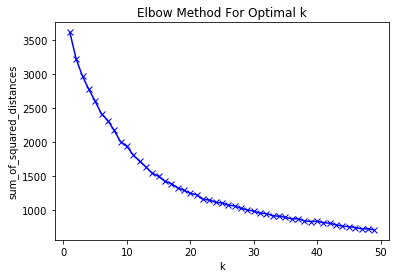

In [33]:
from kneed import KneeLocator
kn = KneeLocator(K, sum_of_squared_distances, curve='convex',direction='decreasing')
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

Elbow method does not seem to help us to determine the optimal number of clusters. Let's use another method.

**The Silhouette Method** - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). 

In [34]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(nyc_transformed)
    labels = kmeans.labels_
    sil.append(silhouette_score(nyc_transformed, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

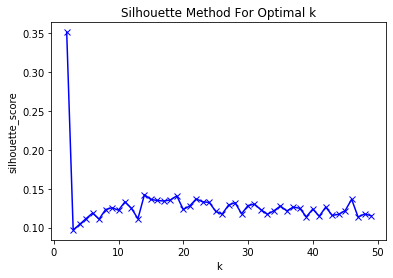

In [35]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

There is a peak at k = 2, k = 5 and k = 7. Two and five clusters will give a very broad classification of the venues.

Let's set number of clusters = 7

In [36]:
kclusters = 7

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(nyc_transformed)

print(kmeans.labels_)

[2 1 3 3 0 3 0 2 0 0 0 0 2 2 0 5 2 0 2 0 1 0 2 0 6 0 3 0 0 4 0 0 1 3 0 0 2
 0 2 0 6 0 0 0 0 2 2 0 2 0 0 0 2 0 2 3 2 0 0 2 0 0 2 2 2 0 0 2 2 2 0 2 0 0
 0 1 2 2 0 2 2 0 0 3 2 3 0 0 2 0 2 4 0 2 1 0 0 0 2 2 0 2 2 2 0 0 3 3 0 2 0
 2 0 0 0 3 2 3 2 0 0 2 0 3 0 1 2 2 2 2 2 2 2 0 0 2 0 2 0 0 2 0 0 2 0 0 2 2
 0 2 0 4 4 0 0 0 0 2 0 2 0 3 2 0 0 0 2 6 0 2 2 0 1 0 0 2 2 6 2 2 2 2 2 2 2
 0 1 3 2 1 2 2 0 0 2 0 2 0 3 2 0 0 2 2 0 6 0 2 0 2 2 2 2 1 0 4 2 0 2 2 2 0
 6 3 0 0 2 2 2 4 2 2 3 2 1 1 0 2 2 2 1 2 3 0 1 2 0 3 0 5 2 1 2 2 0 3 0 0 0
 0 2 0 0 0 0 2 0 0 5 0 0 6 0 0 0 0 2 0 0 0 2 0 2 2 0 2 3 0 2 0 0 1 0 3 0 2
 0 2 0 2 0]


In [37]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [38]:
neighborhoods_venues_sorted.head(5)

Cluster Labels   Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               2       Allerton             Fast_Food              Shopping   
1               1       Annadale             Nightlife             Fast_Food   
2               3  Arden Heights        Transportation              Shopping   
3               3      Arlington        Transportation              Shopping   
4               0       Arrochar           Restaurants              Shopping   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0          Food_markets           Restaurants        Transportation  
1           Restaurants        Transportation        Health_Fitness  
2             Fast_Food               Leisure          Food_markets  
3          Food_markets               Leisure         Personal_care  
4             Fast_Food        Transportation          Food_markets

Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [39]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
nyc_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
Borough = nyc_merged['Borough']

nyc_merged.drop(labels=['Borough'], axis=1,inplace = True)
nyc_merged.insert(0, 'Borough', Borough)

nyc_merged.head()

Borough  Cluster Labels   Neighborhood 1st Most Common Venue  \
0          Bronx               2       Allerton             Fast_Food   
1  Staten Island               1       Annadale             Nightlife   
2  Staten Island               3  Arden Heights        Transportation   
3  Staten Island               3      Arlington        Transportation   
4  Staten Island               0       Arrochar           Restaurants   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0              Shopping          Food_markets           Restaurants   
1             Fast_Food           Restaurants        Transportation   
2              Shopping             Fast_Food               Leisure   
3              Shopping          Food_markets               Leisure   
4              Shopping             Fast_Food        Transportation   

  5th Most Common Venue   Latitude  Longitude  
0        Transportation  40.865788 -73.859319  
1        Health_Fitness  40.538114 -74.178549  
2          Food_markets  40.549286 -74.185887  
3         Personal_care  40.635325 -74.165104  
4          Food_markets  40.596313 -74.067124

Finally, let's visualize the resulting clusters

In [40]:
map_clusters_nyc = folium.Map(location=[latitude_nyc, longitude_nyc], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], 
                                  nyc_merged['Longitude'],
                                  nyc_merged['Neighborhood'],
                                  nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_nyc)
       
map_clusters_nyc

In [41]:
cluster_0_nyc = nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[0:9]]
cluster_0_nyc.head()

Borough  Cluster Labels       Neighborhood 1st Most Common Venue  \
4   Staten Island               0           Arrochar           Restaurants   
6          Queens               0            Astoria           Restaurants   
8          Queens               0         Auburndale              Shopping   
9        Brooklyn               0         Bath Beach           Restaurants   
10      Manhattan               0  Battery Park City              Shopping   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4               Shopping             Fast_Food        Transportation   
6               Shopping             Nightlife             Fast_Food   
8            Restaurants             Nightlife        Health_Fitness   
9               Shopping             Fast_Food          Food_markets   
10         Kids_Friendly             Fast_Food           Restaurants   

   5th Most Common Venue   Latitude  
4           Food_markets  40.596313  
6         Health_Fitness  40.768509  
8           Food_markets  40.761730  
9              Nightlife  40.599519  
10            Short_stay  40.711932

In [42]:
cluster_1_nyc = nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[0:9]]
cluster_1_nyc.head()

Borough  Cluster Labels   Neighborhood 1st Most Common Venue  \
1   Staten Island               1       Annadale             Nightlife   
20         Queens               1   Belle Harbor               Leisure   
32         Queens               1  Broad Channel             Nightlife   
75       Brooklyn               1  Dyker Heights              Shopping   
94          Bronx               1      Fieldston               Leisure   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1              Fast_Food           Restaurants        Transportation   
20           Restaurants         Personal_care              Shopping   
32        Transportation              Shopping             Fast_Food   
75               Leisure             Nightlife         Kids_Friendly   
94        Transportation          Food_markets         Personal_care   

   5th Most Common Venue   Latitude  
1         Health_Fitness  40.538114  
20             Nightlife  40.576156  
32               Leisure  40.603027  
75             Fast_Food  40.619219  
94            Short_stay  40.895437

In [43]:
cluster_2_nyc = nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[0:9]]
cluster_2_nyc.head()

Borough  Cluster Labels     Neighborhood 1st Most Common Venue  \
0           Bronx               2         Allerton             Fast_Food   
7          Queens               2  Astoria Heights          Food_markets   
12         Queens               2      Bay Terrace              Shopping   
12  Staten Island               2      Bay Terrace              Shopping   
13          Bronx               2       Baychester              Shopping   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0               Shopping          Food_markets           Restaurants   
7              Fast_Food           Restaurants               Leisure   
12           Restaurants          Food_markets             Nightlife   
12           Restaurants          Food_markets             Nightlife   
13             Fast_Food           Restaurants        Transportation   

   5th Most Common Venue   Latitude  
0         Transportation  40.865788  
7         Transportation  40.770317  
12         Kids_Friendly  40.782843  
12         Kids_Friendly  40.553988  
13          Food_markets  40.866858

In [44]:
cluster_3_nyc = nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[0:9]]
cluster_3_nyc.head()

Borough  Cluster Labels       Neighborhood 1st Most Common Venue  \
2   Staten Island               3      Arden Heights        Transportation   
3   Staten Island               3          Arlington        Transportation   
5          Queens               3            Arverne              Shopping   
26  Staten Island               3         Bloomfield         Kids_Friendly   
33       Brooklyn               3  Broadway Junction              Shopping   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
2               Shopping             Fast_Food               Leisure   
3               Shopping          Food_markets               Leisure   
5         Transportation             Fast_Food               Leisure   
26        Transportation              Shopping               Leisure   
33        Transportation             Fast_Food             Nightlife   

   5th Most Common Venue   Latitude  
2           Food_markets  40.549286  
3          Personal_care  40.635325  
5              Nightlife  40.589144  
26          Food_markets  40.605779  
33           Restaurants  40.677861

In [45]:
cluster_4_nyc = nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[0:9]]
cluster_4_nyc.head()

Borough  Cluster Labels     Neighborhood 1st Most Common Venue  \
29          Queens               4     Breezy Point               Leisure   
91   Staten Island               4     Emerson Hill               Culture   
151  Staten Island               4  Lighthouse Hill         Personal_care   
152      Manhattan               4   Lincoln Square               Culture   
215  Staten Island               4    Port Richmond        Transportation   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
29                Culture        Health_Fitness        Transportation   
91                Leisure        Transportation          Food_markets   
151               Culture        Health_Fitness           Restaurants   
152              Shopping           Restaurants        Health_Fitness   
215              Shopping               Culture        Health_Fitness   

    5th Most Common Venue   Latitude  
29           Food_markets  40.557401  
91          Personal_care  40.606794  
151               Leisure  40.576506  
152               Leisure  40.773529  
215               Leisure  40.633669

In [46]:
cluster_5_nyc = nyc_merged.loc[nyc_merged['Cluster Labels'] == 5, nyc_merged.columns[0:9]]
cluster_5_nyc.head()

Borough  Cluster Labels Neighborhood 1st Most Common Venue  \
15          Queens               5    Bayswater         Kids_Friendly   
249         Queens               5   Somerville         Kids_Friendly   
268  Staten Island               5    Todt Hill         Kids_Friendly   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
15         Health_Fitness               Leisure        Transportation   
249               Leisure        Transportation          Food_markets   
268               Leisure        Transportation          Food_markets   

    5th Most Common Venue   Latitude  
15           Food_markets  40.611322  
249         Personal_care  40.597711  
268         Personal_care  40.597069

In [47]:
cluster_6_nyc = nyc_merged.loc[nyc_merged['Cluster Labels'] == 6, nyc_merged.columns[0:9]]
cluster_6_nyc.head()

Borough  Cluster Labels  Neighborhood 1st Most Common Venue  \
24        Brooklyn               6  Bergen Beach        Health_Fitness   
40   Staten Island               6  Butler Manor        Health_Fitness   
167       Brooklyn               6   Marine Park        Health_Fitness   
177       Brooklyn               6   Mill Island        Health_Fitness   
205  Staten Island               6     Park Hill        Transportation   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
24          Kids_Friendly              Shopping               Leisure   
40         Transportation              Shopping               Leisure   
167         Kids_Friendly              Shopping             Fast_Food   
177               Leisure        Transportation          Food_markets   
205        Health_Fitness            Short_stay              Shopping   

    5th Most Common Venue   Latitude  
24         Transportation  40.615150  
40           Food_markets  40.506082  
167           Restaurants  40.609748  
177         Personal_care  40.606336  
205               Leisure  40.609190

<a href='#Content'>Click to scroll back to Table of Contents</a>

### Results

A qualitative analysis of the recommended results is a more challenging task since to properly evaluate the suitability of the neighbourhood’s basis the user preferences. K-Means Clustering algorithm gave us 7 clusters according to the 12 categories created. The cluster 0, 1, 2 depicted restaurant as the most common venue in these neighbourhoods, though these clusters meet other requirements as Shopping, Nightlife, health- fitness etc as stated by the user. But customer has to face a great competition as there are many restaurants around. Whereas in cluster 3, 4, 5, and 6 neighbourhoods do not have restaurant as the most common venue. These neighbourhood cluster seems to be quite promising as competition would be less or negligible.

This analysis is very general, so to be more speecific to the user requirements we are creating a recommendation system. 

### Recommendation System
Now, we feed the system with user ratings for each of the 12 categories we created depending on how important each was for the user in a scale of 1-10. For the testing purpose we used a “persona” of a user who has rated each category accordingly.

In [48]:
userInput = [
            {'Venue':'Restaurants','Rating':4},
            {'Venue':'Fast_Food','Rating':6},
            {'Venue':'Health_Fitness','Rating':7},
            {'Venue':'Kids_Friendly','Rating':8},
            {'Venue':'Nightlife','Rating':9},
            {'Venue':'Culture','Rating':8},
            {'Venue':'Shopping','Rating':9},
            {'Venue':'Short_stay','Rating':10},
            {'Venue':'Personal_care','Rating':8},
            {'Venue':'Food_markets','Rating':10},
            {'Venue':'Transportation','Rating':9},
            {'Venue':'Leisure','Rating':8}
         ] 
inputVenues = pd.DataFrame(userInput) 

inputVenues

Venue  Rating
0      Restaurants       4
1        Fast_Food       6
2   Health_Fitness       7
3    Kids_Friendly       8
4        Nightlife       9
5          Culture       8
6         Shopping       9
7       Short_stay      10
8    Personal_care       8
9     Food_markets      10
10  Transportation       9
11         Leisure       8

In [49]:
inputVenues.set_index('Venue', inplace=True)

In [50]:
nyc_grouped_new.set_index('Neighborhood',inplace=True)
nyc_grouped_new.head()

Restaurants  Fast_Food  Health_Fitness  Kids_Friendly  \
Neighborhood                                                           
Allerton          0.142857   0.214286        0.035714            0.0   
Annadale          0.200000   0.200000        0.100000            0.0   
Arden Heights     0.000000   0.200000        0.000000            0.0   
Arlington         0.000000   0.000000        0.000000            0.0   
Arrochar          0.263158   0.157895        0.052632            0.0   

               Nightlife   Culture  Shopping  Short_stay  Personal_care  \
Neighborhood                                                              
Allerton        0.000000  0.035714  0.178571    0.000000       0.035714   
Annadale        0.300000  0.000000  0.000000    0.000000       0.000000   
Arden Heights   0.000000  0.000000  0.200000    0.000000       0.000000   
Arlington       0.000000  0.000000  0.285714    0.000000       0.000000   
Arrochar        0.052632  0.000000  0.157895    0.052632       0.000000   

               Food_markets  Transportation  Leisure  
Neighborhood                                          
Allerton           0.142857        0.035714      0.0  
Annadale           0.000000        0.100000      0.0  
Arden Heights      0.000000        0.200000      0.0  
Arlington          0.142857        0.571429      0.0  
Arrochar           0.052632        0.105263      0.0

Next we created the user preferences matrix by calculating the weighted average of the user ratings against the frequency of each category and for all Toronto neighborhoods in our dataframe. The result was sorted to a top 5 list of recommended Neighborhoods basis user profile which were then plotted on the map of Toronto.

In [51]:
recommendationTable = ((nyc_grouped_new*inputVenues['Rating']).sum(axis=1))/(inputVenues['Rating'].sum())
recommendationTable.head(5)

Neighborhood
Allerton         0.062872
Annadale         0.065625
Arden Heights    0.050000
Arlington        0.095238
Arrochar         0.065241
dtype: float64

In [52]:
recommendationTable = recommendationTable.sort_values(ascending=False)
recommendationTable.head()

Neighborhood
Graniteville    0.102083
Mount Hope      0.100160
Weeksville      0.098958
Arlington       0.095238
Port Ivory      0.093750
dtype: float64

In [53]:
TOR= recommendationTable.to_frame().reset_index()
TOR.head()

Neighborhood         0
0  Graniteville  0.102083
1    Mount Hope  0.100160
2    Weeksville  0.098958
3     Arlington  0.095238
4    Port Ivory  0.093750

We add the Neighborhood coordinates to map our results:

In [54]:
recommendT=pd.merge(TOR,neighborhoods, on="Neighborhood")
recommendT.rename(columns={0:'Weighted average'},inplace=True)
result=recommendT.head(5)
result

Neighborhood  Weighted average        Borough   Latitude  Longitude
0  Graniteville          0.102083  Staten Island  40.620172 -74.153152
1    Mount Hope          0.100160          Bronx  40.848842 -73.908299
2    Weeksville          0.098958       Brooklyn  40.675040 -73.930531
3     Arlington          0.095238  Staten Island  40.635325 -74.165104
4    Port Ivory          0.093750  Staten Island  40.639683 -74.174645

Lets display the top 5 venues for each recommended Neighborhood to see similarities as stated by the user:

In [55]:
compare=neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood'].isin(result['Neighborhood'])]
compare

Cluster Labels  Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
3                 3     Arlington        Transportation              Shopping   
115               3  Graniteville        Transportation             Fast_Food   
184               2    Mount Hope              Shopping          Food_markets   
213               1    Port Ivory             Nightlife               Leisure   
284               0    Weeksville              Shopping             Nightlife   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
3            Food_markets               Leisure         Personal_care  
115          Food_markets              Shopping               Leisure  
184           Restaurants        Transportation         Personal_care  
213        Transportation          Food_markets         Personal_care  
284          Food_markets           Restaurants               Culture

Filtering top 5 Cluster labels and neighborhoods to map them using foilum library. 

In [56]:
resultmap=compare[['Cluster Labels','Neighborhood']]
resultmap

Cluster Labels  Neighborhood
3                 3     Arlington
115               3  Graniteville
184               2    Mount Hope
213               1    Port Ivory
284               0    Weeksville

In [57]:
# merging with neighborhood dataframe to get neighborhood latitude and longitude
recommendTmap=pd.merge(resultmap,neighborhoods, on="Neighborhood")
recommendTmap

Cluster Labels  Neighborhood        Borough   Latitude  Longitude
0               3     Arlington  Staten Island  40.635325 -74.165104
1               3  Graniteville  Staten Island  40.620172 -74.153152
2               2    Mount Hope          Bronx  40.848842 -73.908299
3               1    Port Ivory  Staten Island  40.639683 -74.174645
4               0    Weeksville       Brooklyn  40.675040 -73.930531

Let's see our recommended Neighborhoods in the map:

In [58]:
map_recommendation_nyc = folium.Map(location=[latitude_nyc, longitude_nyc], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(recommendTmap['Latitude'], 
                                  recommendTmap['Longitude'],
                                  recommendTmap['Neighborhood'],
                                  recommendTmap['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_recommendation_nyc)
       
map_recommendation_nyc

<a href='#Content'>Click to scroll back to Table of Contents</a>

# Future Scope

This analysis is performed on limited data. If good amount of data is available there is scope to come up with better results. This problem can be further enhanced by considering population and demographics of New York, cuisine served.